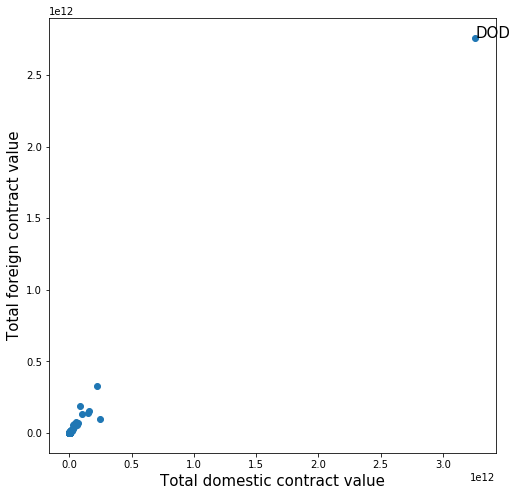

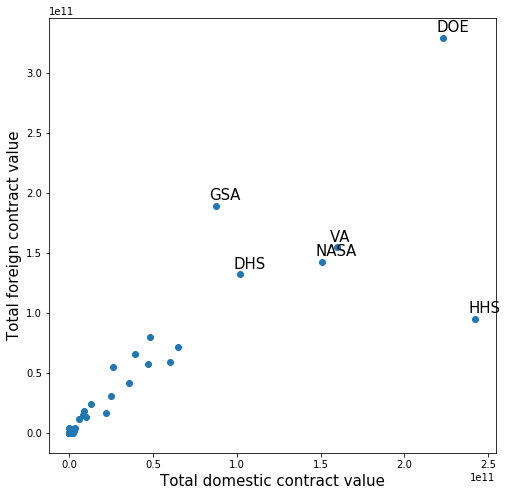

median foregin spending:  212643618.62
average foregin spending:  49389312174.00573
median domestic spending:  154337198.07
average domestic spending:  52373969560.54089


In [6]:
%matplotlib inline

#imports
from numpy import *
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

import numpy as np
from prettytable import PrettyTable
import csv as csv

# nameOfAgency = []
# foreignSpendingByAgency = []
# domesticSpendingByAgency = []
agencyToSpending = {} #agency name is key, points to a list containg the list of domestic, then list of foregin spending

with open ('domesticSumsByDept.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    for row in reader:
        key = row[1]
        agencyToSpending[key] = [0.0,0.0]
        agencyToSpending[key][0] = float(row[0])

        
with open ('nonDomesticSumsByDept.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter = ',')
    for row in reader:
        key = row[1]
        if key not in agencyToSpending:
            agencyToSpending[key] = [0.0,0.0]
        agencyToSpending[key][1] = float(row[0])

domesticSpending = []
foreignSpending = []
for x in agencyToSpending:
    domesticSpending.append(agencyToSpending[x][0])
    foreignSpending.append(agencyToSpending[x][1])


#DoD vs everyone else
plt.scatter(domesticSpending,foreignSpending)
plt.ylabel('Total foreign contract value', fontsize=15)
plt.xlabel('Total domestic contract value', fontsize=15)
plt.annotate('DOD',(agencyToSpending['DEPARTMENT OF DEFENSE (DOD)'][0],
                                            agencyToSpending['DEPARTMENT OF DEFENSE (DOD)'][1]), fontsize=15)    
plt.show()

tier2Agencies = {}
for agency in agencyToSpending:
    if agencyToSpending[agency][0] < 10**12:
        tier2Agencies[agency] = agencyToSpending[agency]
tier2X = [tier2Agencies[x][0] for x in tier2Agencies]
tier2Y = [tier2Agencies[x][1] for x in tier2Agencies]
plt.scatter(tier2X,tier2Y)
for x,y,label in zip(tier2X,tier2Y,tier2Agencies.keys()):
    if x > .8*(10**11):
        plt.annotate(label.split('(')[1].split(')')[0],(x - .4*10**10 ,y+.5*10**10), fontsize=15)
plt.ylabel('Total foreign contract value', fontsize=15)
plt.xlabel('Total domestic contract value', fontsize=15)
plt.show()

# #.4*10**11
# tier3Agencies = {}
# for agency in agencyToSpending:
#     if agencyToSpending[agency][0] < .5*10**11:
#         tier3Agencies[agency] = agencyToSpending[agency]
# tier3X = [tier3Agencies[x][0] for x in tier3Agencies]
# tier3Y = [tier3Agencies[x][1] for x in tier3Agencies]
# plt.scatter(tier3X,tier3Y)
# for x,y,label in zip(tier3X,tier3Y,tier3Agencies.keys()):
#     if x > .6*(10**10):
#         plt.annotate(label,(x,y))
# plt.ylabel('Total foreign contract value')
# plt.xlabel('Total domestic contract value')
# plt.show()

averageForeignSpending = sum(foreignSpending) / len(foreignSpending)
domesticSpendingByAgency = sum(domesticSpending) / len(domesticSpending)
print('median foregin spending: ', median(foreignSpending))
print('average foregin spending: ', averageForeignSpending)
print('median domestic spending: ', median(domesticSpending))
print('average domestic spending: ', domesticSpendingByAgency)